<a href="https://colab.research.google.com/github/alanmejiaa/Procesamiento-y-Clasificacion-de-Datos-2024/blob/main/Tarea%20%236.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea #6

In [48]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [49]:
# Función para cargar y preprocesar los audios
def load_and_preprocess_audio(file_path):
    y, sr = librosa.load(file_path, sr=None)
    y = librosa.effects.trim(y)[0]  # Recortar el silencio
    return y, sr

In [50]:
# Lista de archivos de audio
audio_files = ['mar.mp4', 'bosque.mp4', 'ciudad.mp4', 'desierto.mp4']
audio_labels = ['Mar', 'Bosque', 'Ciudad', 'Desierto']

In [51]:
# Cargar y preprocesar los audios
audios = [load_and_preprocess_audio(path) for path in audio_files]

<ipython-input-49-0a50a1b491bc>:3: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-49-0a50a1b491bc>:3: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-49-0a50a1b491bc>:3: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/cor

In [52]:
# Verificar la carga de los audios
for i, (audio, sr) in enumerate(audios):
    print(f'{audio_labels[i]}: Duración {len(audio)/sr:.2f} segundos, Tasa de Muestreo {sr} Hz')

Mar: Duración 40.87 segundos, Tasa de Muestreo 44100 Hz
Bosque: Duración 112.35 segundos, Tasa de Muestreo 44100 Hz
Ciudad: Duración 94.08 segundos, Tasa de Muestreo 44100 Hz
Desierto: Duración 20.20 segundos, Tasa de Muestreo 44100 Hz


In [53]:
# Función para graficar la forma de onda
def plot_waveform(audio, sr, title):
    plt.figure(figsize=(20, 5))
    librosa.display.waveshow(audio, sr=sr)
    plt.title(title)
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.show()

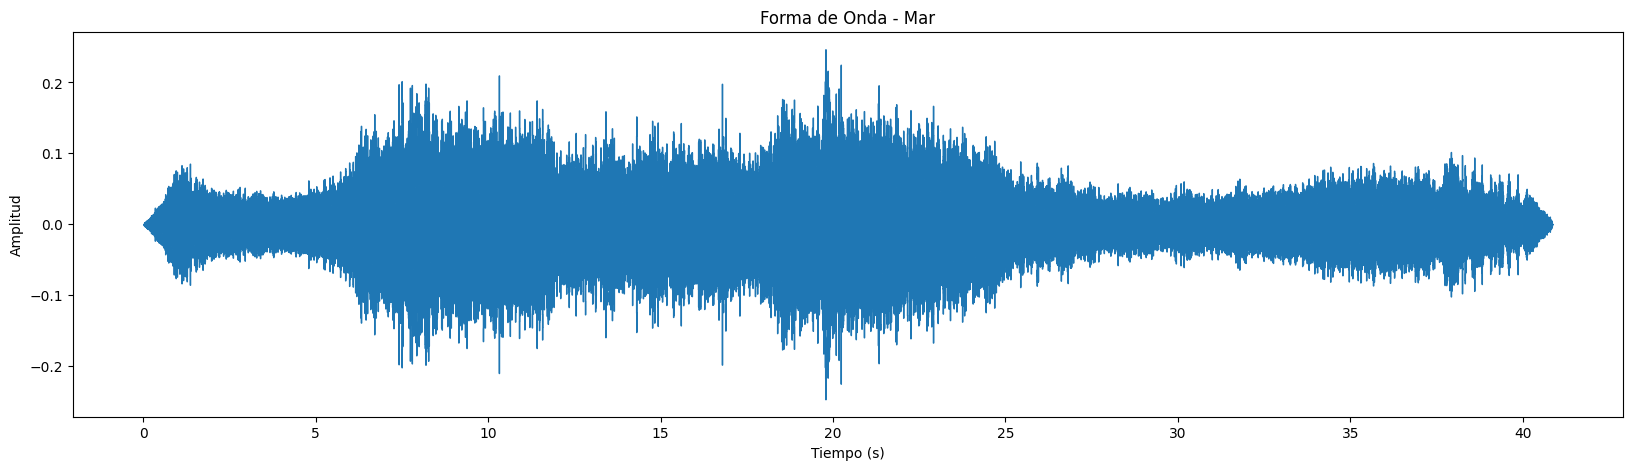

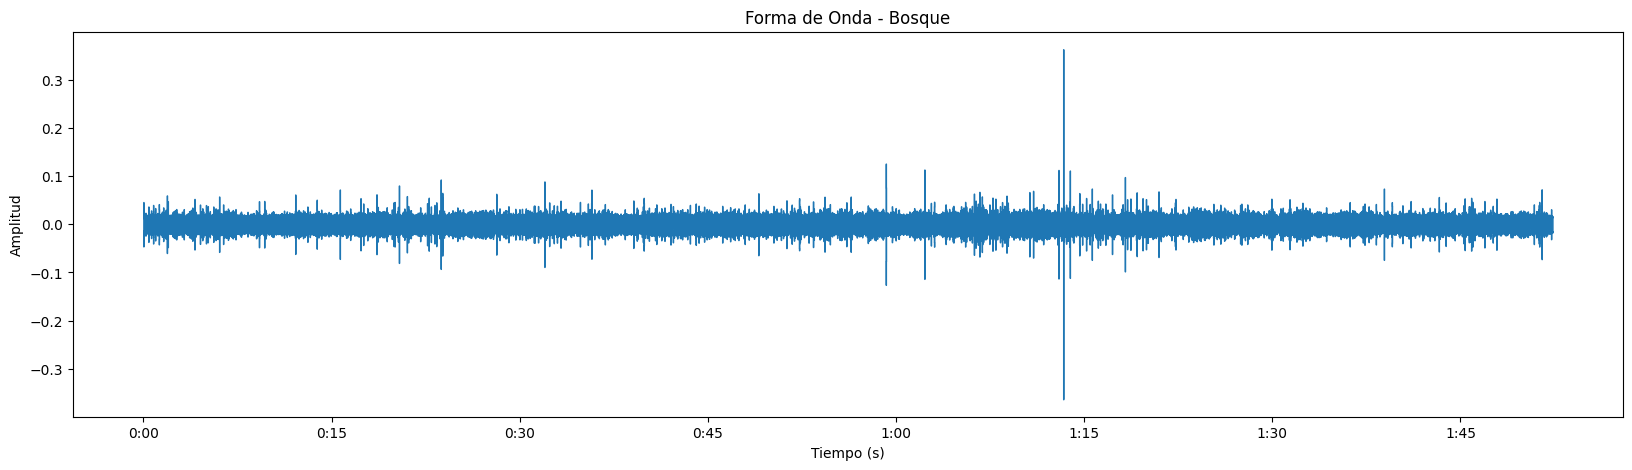

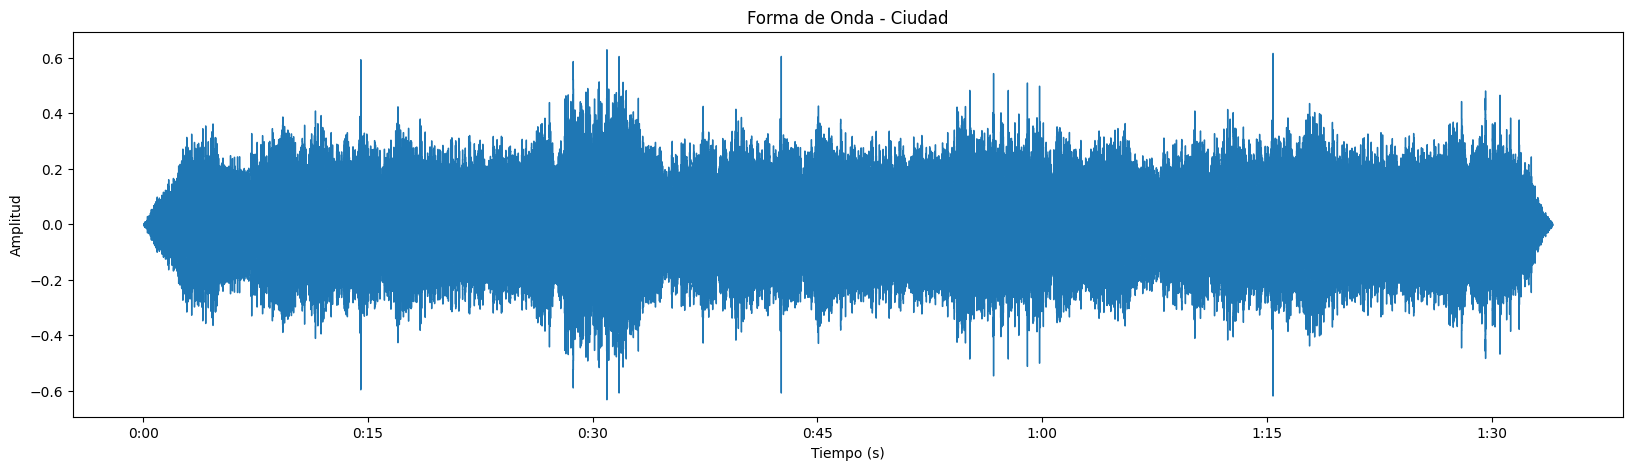

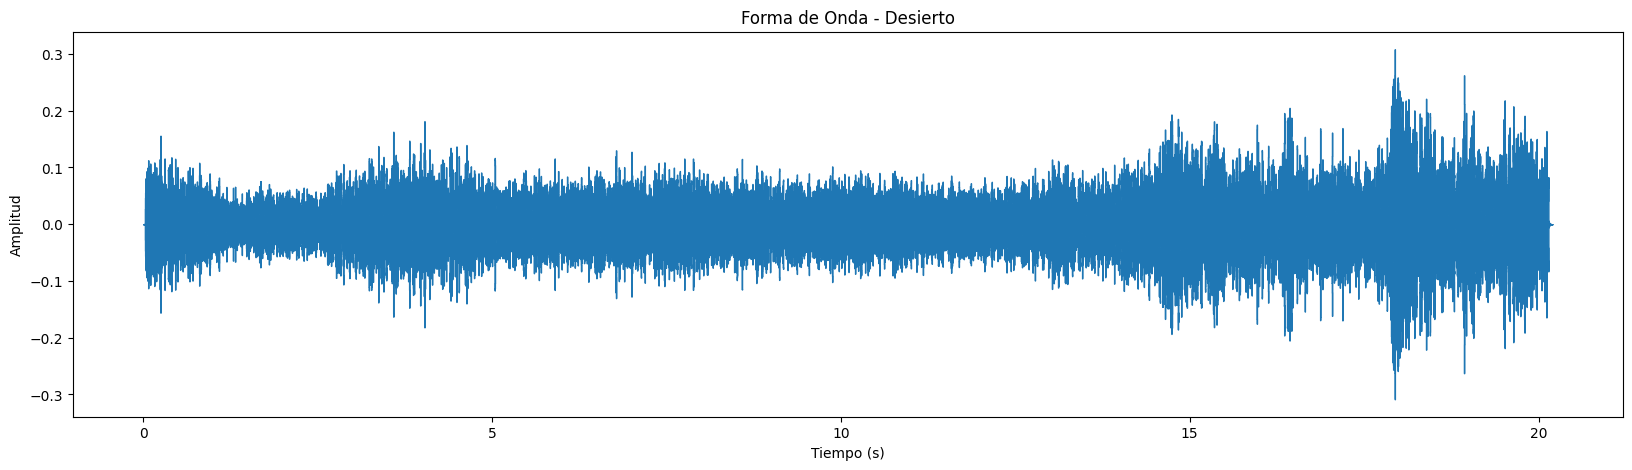

In [54]:
# Generar y visualizar las formas de onda
for i, (audio, sr) in enumerate(audios):
    plot_waveform(audio, sr, f'Forma de Onda - {audio_labels[i]}')

In [55]:
# Función para extraer MFCCs
def extract_mfcc(audio, sr):
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    return mfccs

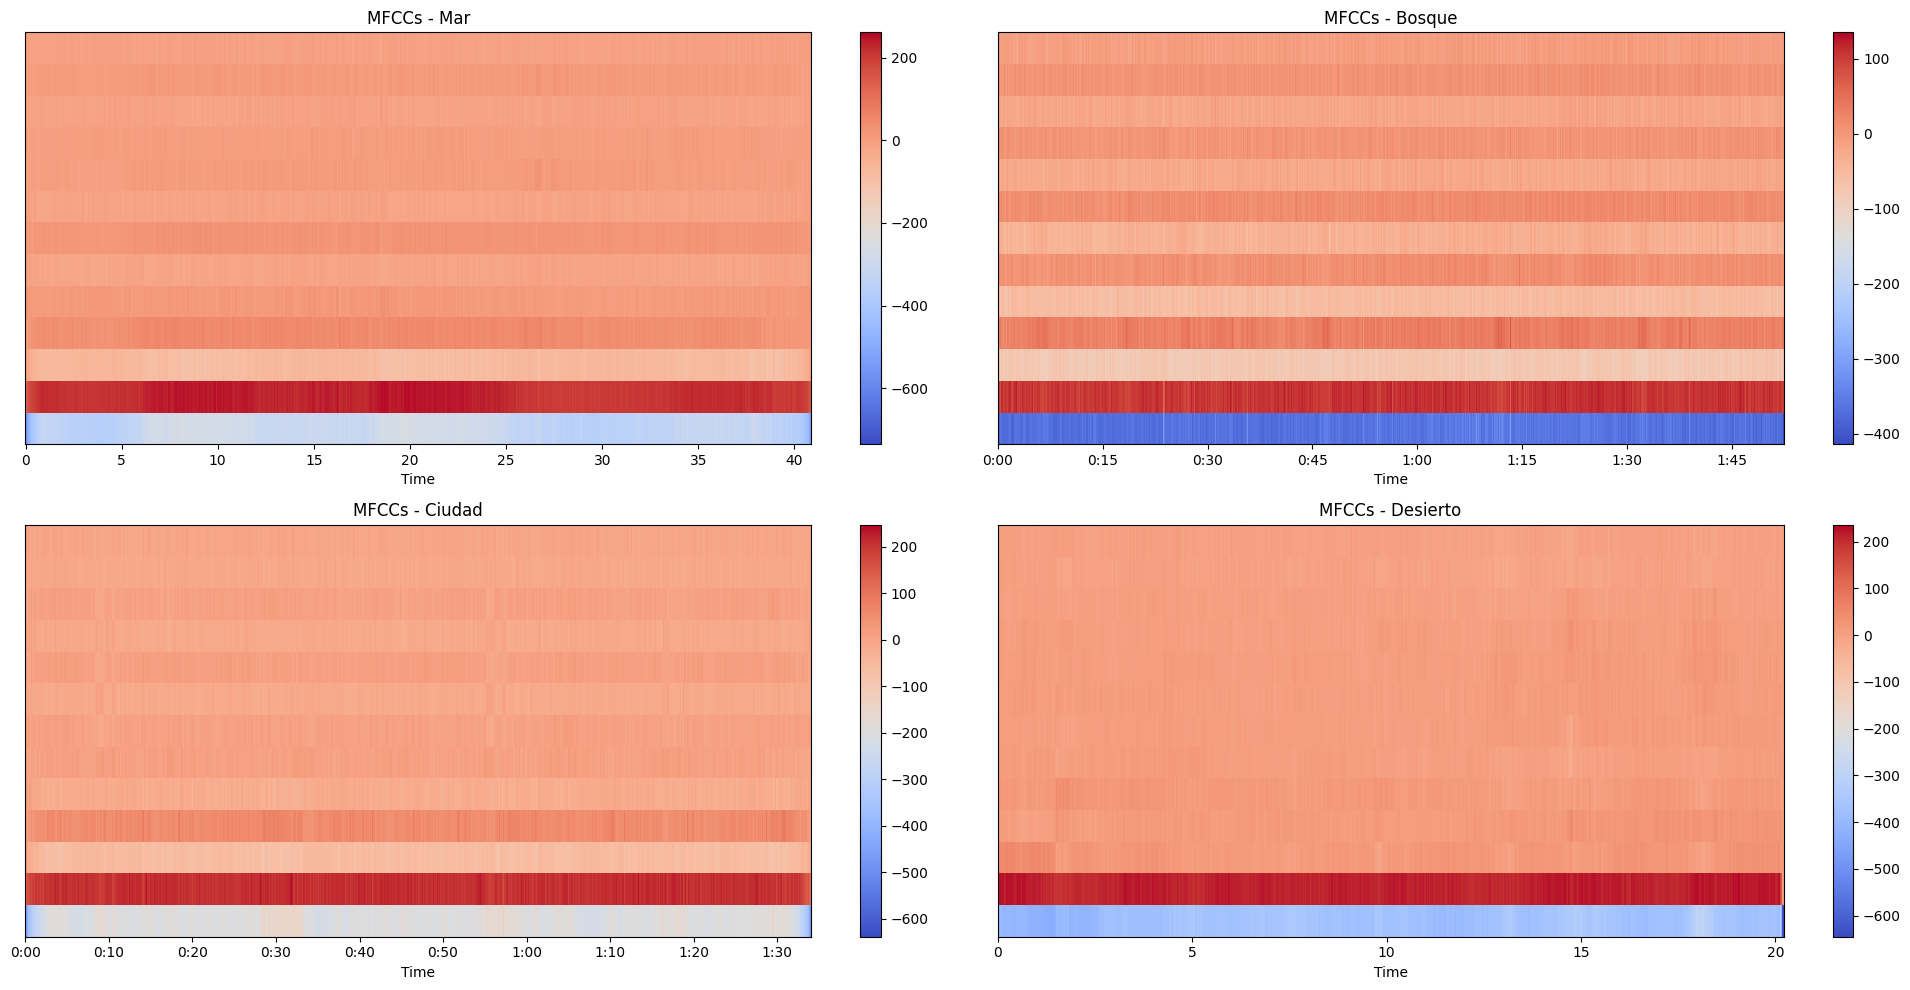

In [57]:
# Extraer y visualizar los MFCCs
mfccs_list = [extract_mfcc(audio, sr) for audio, sr in audios]

plt.figure(figsize=(20, 10))
for i, mfccs in enumerate(mfccs_list):
    plt.subplot(2, 2, i+1)
    librosa.display.specshow(mfccs, sr=audios[i][1], x_axis='time')
    plt.colorbar()
    plt.title(f'MFCCs - {audio_labels[i]}')
plt.tight_layout()
plt.show()

In [58]:
# Función para generar los espectrogramas
def plot_spectrogram(audio, sr, title):
    S = librosa.stft(audio)
    S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)
    plt.figure(figsize=(8, 5))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()


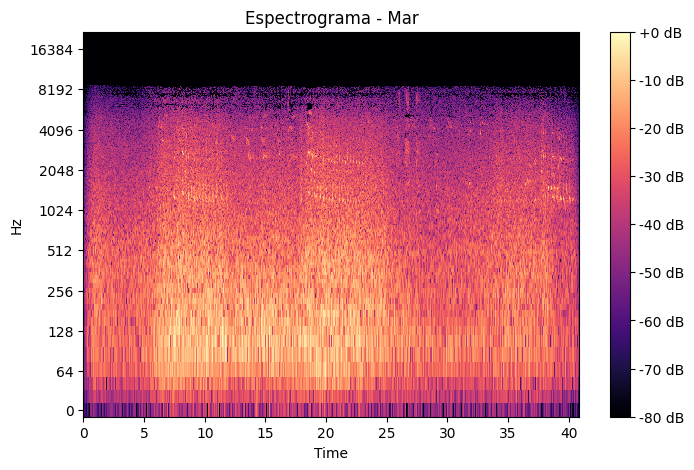

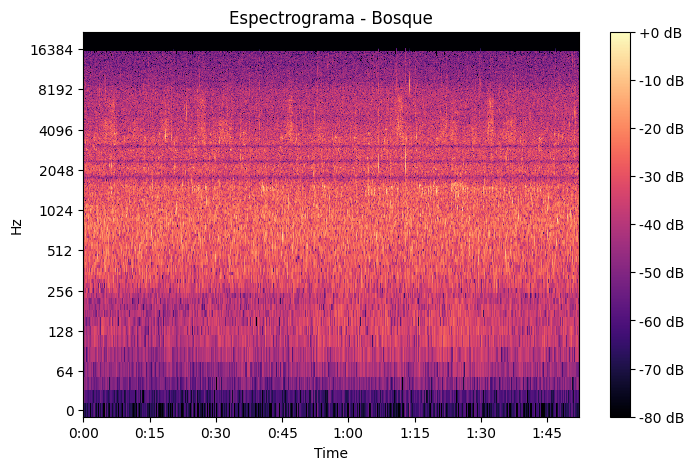

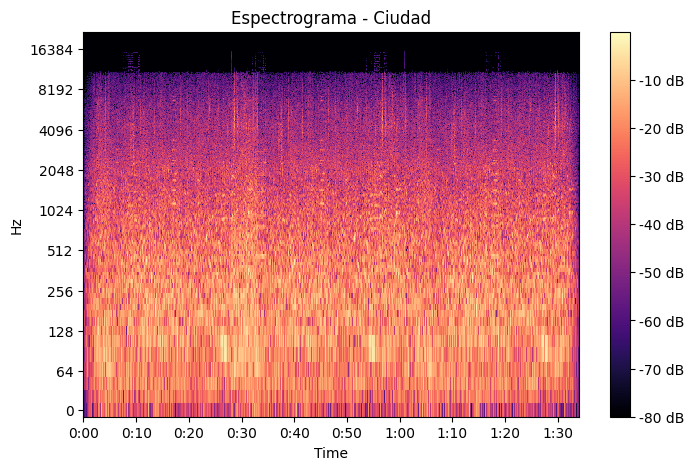

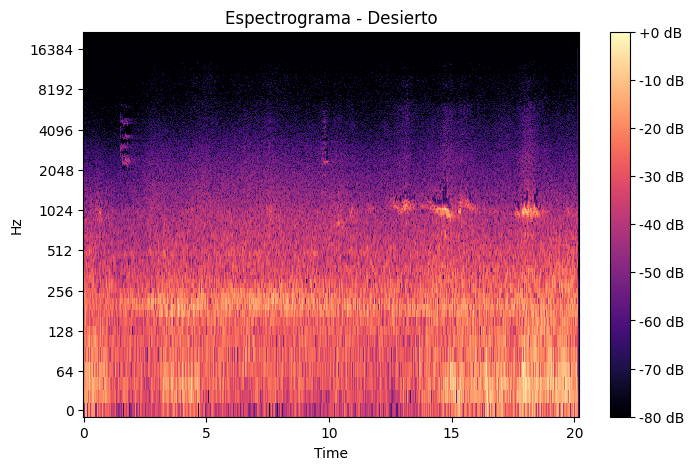

In [59]:
# Generar y visualizar los espectrogramas
for i, (audio, sr) in enumerate(audios):
    plot_spectrogram(audio, sr, f'Espectrograma - {audio_labels[i]}')

In [65]:
# Generar espectrogramas con los sonidos más opuestos (Mar y Ciudad) y con los cuatro juntos
opposite_audios = [audios[0], audios[2]]  # Mar y Ciudad
combined_audio_opposite = np.concatenate([opposite_audios[0][0], opposite_audios[1][0]])
combined_sr_opposite = min(opposite_audios[0][1], opposite_audios[1][1])  # Usar la tasa de muestreo más baja

combined_audio_all = np.concatenate([audio for audio, sr in audios])
combined_sr_all = min([sr for audio, sr in audios])  # Usar la tasa de muestreo más baja

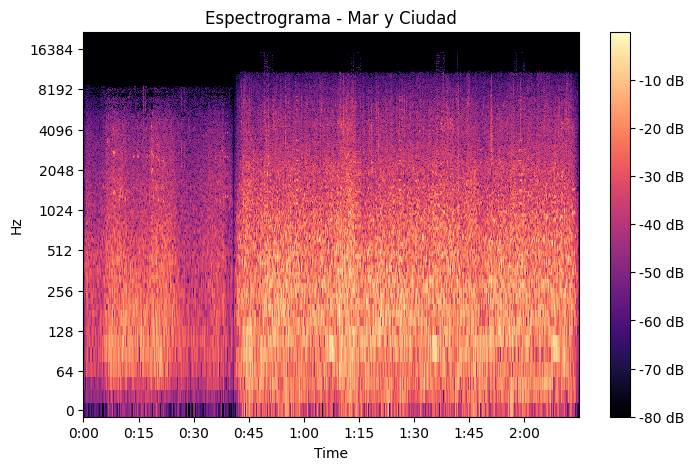

In [66]:
# Espectrograma de los sonidos más opuestos juntos (Mar y Ciudad)
plot_spectrogram(combined_audio_opposite, combined_sr_opposite, 'Espectrograma - Mar y Ciudad')

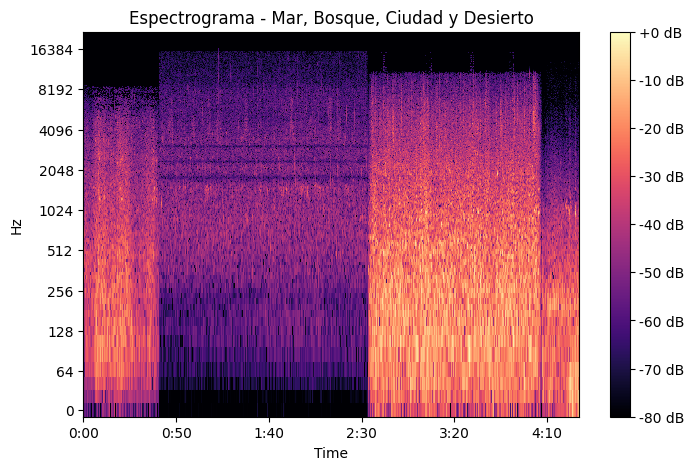

In [67]:
# Espectrograma de los cuatro sonidos juntos
plot_spectrogram(combined_audio_all, combined_sr_all, 'Espectrograma - Mar, Bosque, Ciudad y Desierto')

In [60]:
# Función para extraer frecuencias representativas y convertir a dB
def extract_representative_frequencies_db(audio, sr):
    S = np.abs(librosa.stft(audio))
    freqs = librosa.fft_frequencies(sr=sr)
    magnitudes = np.mean(S, axis=1)
    magnitudes_db = librosa.amplitude_to_db(magnitudes, ref=np.max)
    return freqs, magnitudes_db

In [61]:
# Extraer frecuencias representativas para cada audio
representative_frequencies_db = [extract_representative_frequencies_db(audio, sr) for audio, sr in audios]

In [62]:
# Filtrar frecuencias superiores a 2000 Hz para una visualización más clara
filtered_frequencies_db = [(freqs[freqs <= 2000], mags[freqs <= 2000]) for freqs, mags in representative_frequencies_db]

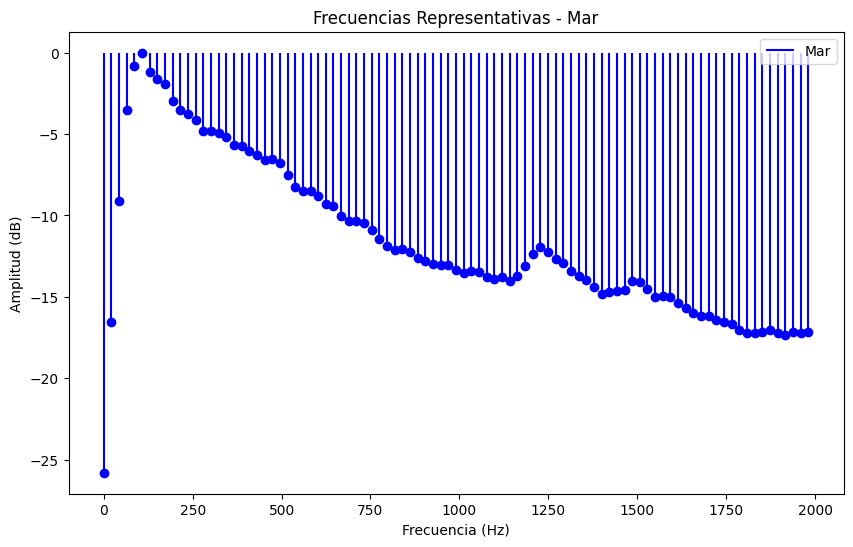

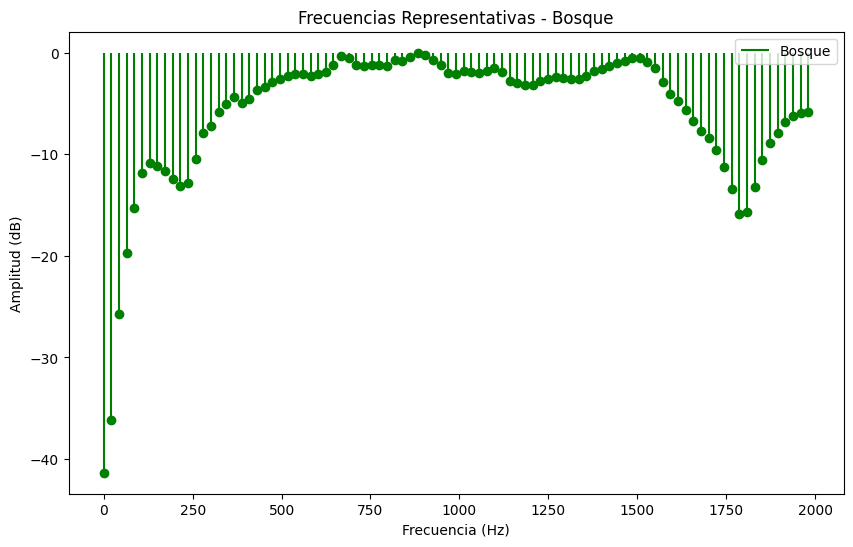

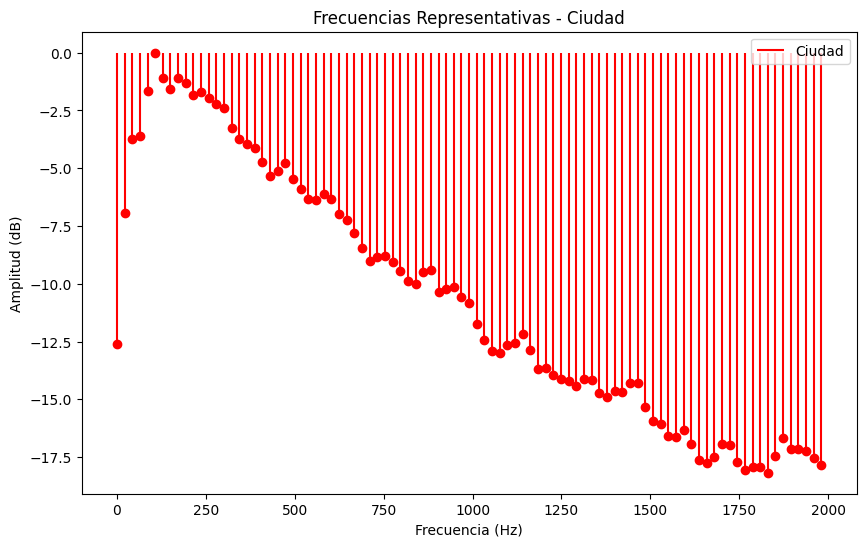

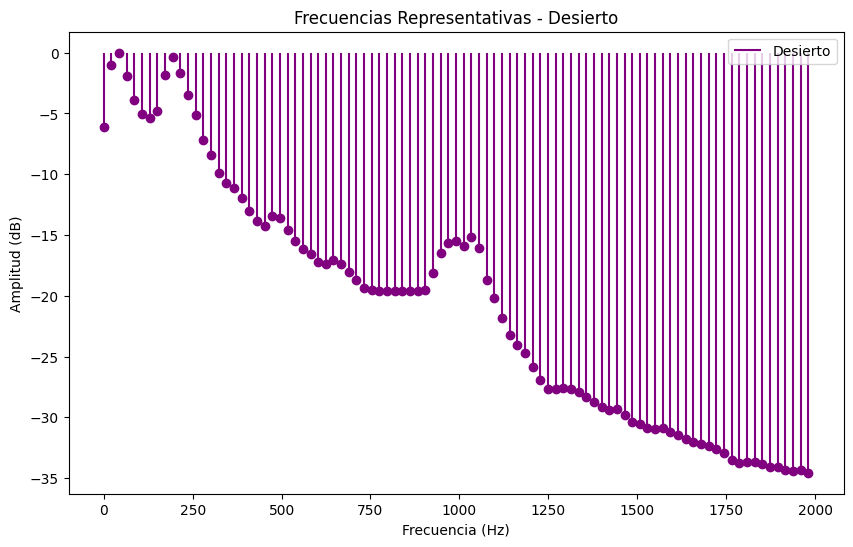

In [64]:
# Visualizar las frecuencias representativas en dB para cada audio
labels = ['Mar', 'Bosque', 'Ciudad', 'Desierto']
colors = ['blue', 'green', 'red', 'purple']

for i, (freqs, mags) in enumerate(filtered_frequencies_db):
    plt.figure(figsize=(10, 6))
    plt.vlines(freqs, 0, mags, colors=colors[i], label=labels[i])
    plt.scatter(freqs, mags, color=colors[i])
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Amplitud (dB)')
    plt.title(f'Frecuencias Representativas - {labels[i]}')
    plt.legend()
    plt.show()

In [69]:
def plot_representative_frequencies(audio, sr, title):
    freqs, magnitudes_db = extract_representative_frequencies_db(audio, sr)
    filtered_freqs = freqs[freqs <= 2000]
    filtered_mags = magnitudes_db[freqs <= 2000]

    plt.figure(figsize=(10, 6))
    plt.vlines(filtered_freqs, 0, filtered_mags, colors='b')
    plt.scatter(filtered_freqs, filtered_mags, color='b')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Amplitud (dB)')
    plt.title(title)
    plt.show()

In [72]:
def plot_representative_frequencies_overlayed(audios, srs, labels, title):
    plt.figure(figsize=(10, 6))
    colors = ['blue', 'green', 'red', 'purple']

    for i, (audio, sr) in enumerate(zip(audios, srs)):
        freqs, magnitudes_db = extract_representative_frequencies_db(audio, sr)
        filtered_freqs = freqs[freqs <= 2000]
        filtered_mags = magnitudes_db[freqs <= 2000]

        plt.vlines(filtered_freqs, 0, filtered_mags, colors=colors[i], label=labels[i])
        plt.scatter(filtered_freqs, filtered_mags, color=colors[i])

    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Amplitud (dB)')
    plt.title(title)
    plt.legend()
    plt.show()

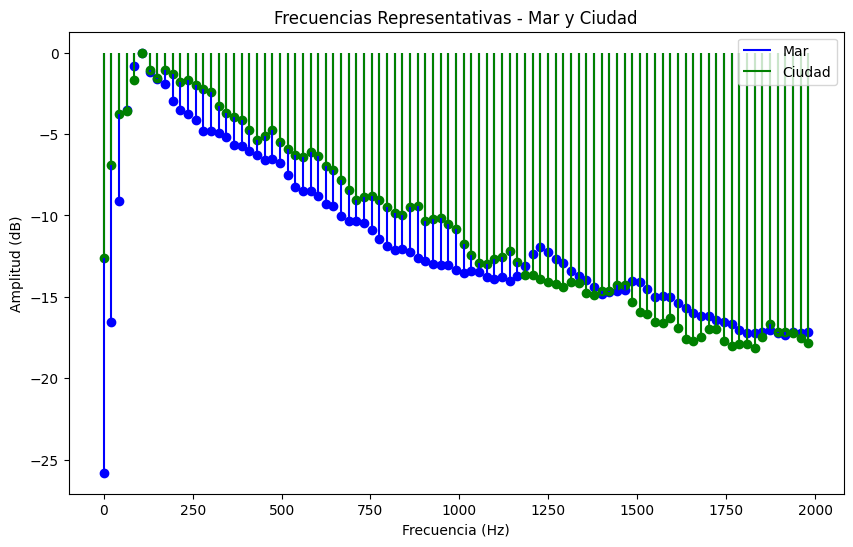

In [73]:
# Frecuencias representativas de los sonidos más opuestos (Mar y Ciudad) sobrepuestos
plot_representative_frequencies_overlayed(
    [audios[0][0], audios[2][0]],
    [audios[0][1], audios[2][1]],
    ['Mar', 'Ciudad'],
    'Frecuencias Representativas - Mar y Ciudad'
)

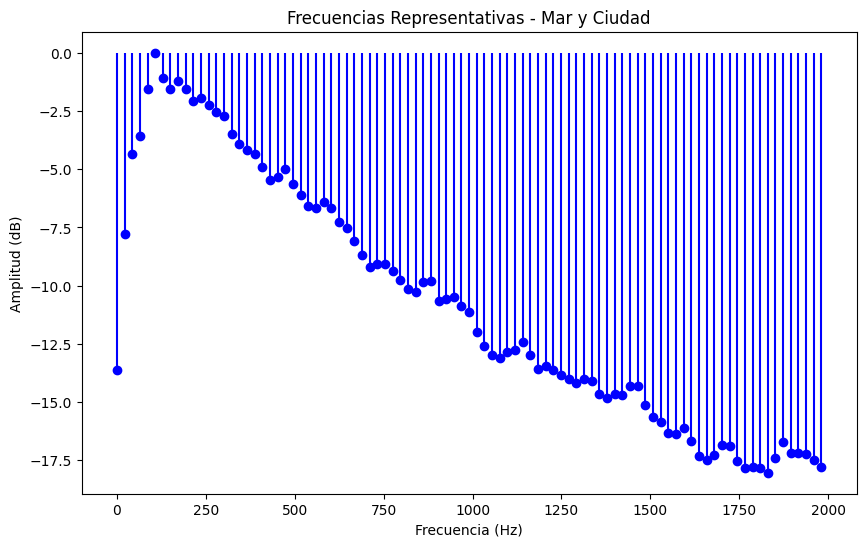

In [70]:
# Frecuencias representativas de los sonidos más opuestos juntos (Mar y Ciudad)
plot_representative_frequencies(combined_audio_opposite, combined_sr_opposite, 'Frecuencias Representativas - Mar y Ciudad')

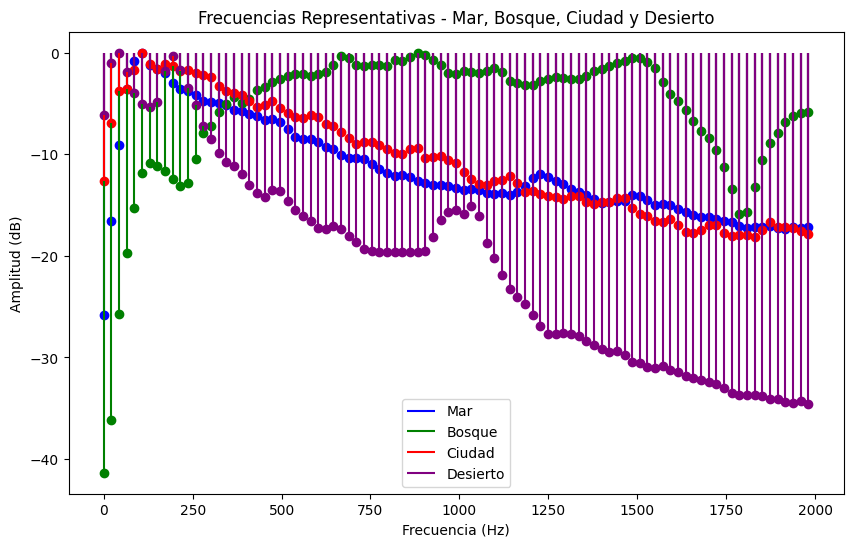

In [74]:
# Frecuencias representativas de los cuatro sonidos sobrepuestos
plot_representative_frequencies_overlayed(
    [audio for audio, sr in audios],
    [sr for audio, sr in audios],
    ['Mar', 'Bosque', 'Ciudad', 'Desierto'],
    'Frecuencias Representativas - Mar, Bosque, Ciudad y Desierto'
)

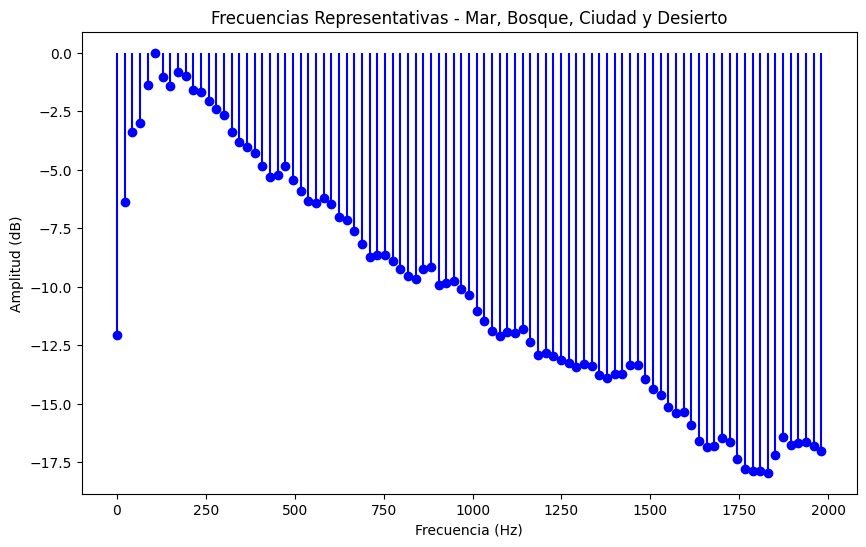

In [71]:
# Frecuencias representativas de los cuatro sonidos juntos
plot_representative_frequencies(combined_audio_all, combined_sr_all, 'Frecuencias Representativas - Mar, Bosque, Ciudad y Desierto')
